# Introduction
For the project work I used GIT and It had multiple separate python files (to implement functionalities and run trainings) and notebook files (to evaluate the results). This repository is available here:
This notebook contains the implemented functionalities (available in the src/folder), the trainings run and the evaluation done.

# Functionalities
This part contains the content of the src/ folder in the git repository. These can be general purpose functionalities (e.g. logging, plotting) but also the data pipeline, the implemented models and training loops are available here. This is the first part because the rest of the project use these functionalities.

### `__init__.py`

### `plotting.py`

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_mask_grid(pairs, columns=3, scale = 6, path = None):
    """
    Plots image-mask pairs in a grid.

    Args:
        pairs: List of (image, mask) tuples, where image and mask are numpy arrays in HWC format.
        columns: Number of image-mask columns per row.
        figsize: Size of each column in inches (width, height).
    """
    rows = int(np.ceil(len(pairs) / columns))

    # calculate image size
    im_H = pairs[0][0].shape[0]
    im_W = pairs[0][0].shape[1]
    padding = im_W/10
    fig_W = columns * 2 * im_W + (columns * 2 +1)*padding
    fig_H = rows*im_H + (rows+1)*padding
    # norm and scale
    fig_W = fig_W/fig_H*scale
    fig_H = scale
    fig, axs = plt.subplots(rows, columns * 2, figsize=(fig_W, fig_H))
    #fig, axs = plt.subplots(rows, columns * 2)

    if rows == 1:
        axs = np.expand_dims(axs, 0)  # handle single-row case

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 2]
        ax_mask = axs[row, col * 2 + 1]

        if i < len(pairs):
            image, mask = pairs[i]
            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')
        else:
            # Empty subplot if not enough data
            ax_img.axis('off')
            ax_mask.axis('off')

        # Write 'image' and 'mask' labels below empty subplots
        if i < columns:
            ax_img.set_title('Image', fontsize=20*scale/10)
            ax_mask.set_title('Ground truth', fontsize=20*scale/10)
    #plt.subplots_adjust(hspace=0.1, wspace=0.1)  # finer manual control

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()

def plot_image_mask_prediction_grid(triplets, columns=3, scale=6, path=None):
    """
    Plots image-mask-prediction triplets in a grid.

    Args:
        triplets: List of (image, mask, prediction) tuples, where each element is a numpy array in HWC or HW format.
        columns: Number of image sets per row.
        scale: Scaling factor for figure size.
        path: Optional path to save the figure.
    """
    rows = int(np.ceil(len(triplets) / columns))

    # Image dimensions
    im_H = triplets[0][0].shape[0]
    im_W = triplets[0][0].shape[1]
    padding = im_W / 10
    fig_W = columns * 3 * im_W + (columns * 3 + 1) * padding
    fig_H = rows * im_H + (rows + 1) * padding

    # Normalize and scale figure size
    fig_W = fig_W / fig_H * scale
    fig_H = scale

    fig, axs = plt.subplots(rows, columns * 3, figsize=(fig_W, fig_H))

    if rows == 1:
        axs = np.expand_dims(axs, 0)  # handle single-row case

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 3]
        ax_mask = axs[row, col * 3 + 1]
        ax_pred = axs[row, col * 3 + 2]

        if i < len(triplets):
            image, mask, pred = triplets[i]

            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')

            ax_pred.imshow(pred.squeeze(), cmap='gray')
            ax_pred.axis('off')
        else:
            ax_img.axis('off')
            ax_mask.axis('off')
            ax_pred.axis('off')

        # Add titles only for the first row
        if i < columns:
            ax_img.set_title('Image', fontsize=20 * fig_W / 10)
            ax_mask.set_title('Ground Truth', fontsize=20 * fig_W / 10)
            ax_pred.set_title('Prediction', fontsize=20 * fig_W / 10)

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()


def plot_image_mask_prediction_grid_with_dice(triplets, columns=3, scale=6, path=None):
    """
    Plots image-mask-prediction triplets with Dice score in a grid.

    Args:
        triplets: List of (image, mask, prediction, dice_score) tuples.
        columns: Number of image sets per row.
        scale: Scaling factor for figure size.
        path: Optional path to save the figure.
    """
    rows = int(np.ceil(len(triplets) / columns))

    im_H = triplets[0][0].shape[0]
    im_W = triplets[0][0].shape[1]
    padding = im_W / 10
    fig_W = columns * 3 * im_W + (columns * 3 + 1) * padding
    fig_H = rows * im_H + (rows + 1) * padding

    fig_W = fig_W / fig_H * scale
    fig_H = scale

    fig, axs = plt.subplots(rows, columns * 3, figsize=(fig_W, fig_H))

    if rows == 1:
        axs = np.expand_dims(axs, 0)

    for i in range(rows * columns):
        row = i // columns
        col = i % columns
        ax_img = axs[row, col * 3]
        ax_mask = axs[row, col * 3 + 1]
        ax_pred = axs[row, col * 3 + 2]

        if i < len(triplets):
            image, mask, pred, dice = triplets[i]

            ax_img.imshow(image)
            ax_img.axis('off')

            ax_mask.imshow(mask.squeeze(), cmap='gray')
            ax_mask.axis('off')

            ax_pred.imshow(pred.squeeze(), cmap='gray')
            ax_pred.axis('off')

            # Display provided Dice score
            ax_pred.text(0.5, -0.15, f"Dice: {dice:.3f}", transform=ax_pred.transAxes,
                         ha='center', va='top', fontsize=10, color='black')

        else:
            ax_img.axis('off')
            ax_mask.axis('off')
            ax_pred.axis('off')

        if i < columns:
            ax_img.set_title('Image', fontsize=20 * fig_W / 10)
            ax_mask.set_title('Ground Truth', fontsize=20 * fig_W / 10)
            ax_pred.set_title('Prediction', fontsize=20 * fig_W / 10)

    plt.tight_layout()
    if path:
        plt.savefig(path, dpi=300, bbox_inches='tight')
    plt.show()

### `utils.py`

In [2]:
import pandas as pd
import os
import numpy as np
import torch

def log_training_result(csv_path, new_row):
    """
    Logs a training result to a CSV file using pandas.

    Args:
        csv_path (str): Path to the CSV file.
        new_row (dict): Dictionary of training values to log. 
                        Keys are column names; values are the record values.
    """
    # Load existing CSV or create new DataFrame
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
    else:
        df = pd.DataFrame()

    # Add missing columns from new_row
    for key in new_row:
        if key not in df.columns:
            df[key] = None  # or pd.NA

    # Ensure all columns are included in the new row (missing cols = None)
    for col in df.columns:
        if col not in new_row:
            new_row[col] = None

    # Append the new row
    df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

    # Save it back to CSV
    df.to_csv(csv_path, index=False)

# save the results of the training
def save_model_files(files_path, model_weights, np_arrays, override = False):
    if os.path.exists(files_path) and not override:
        raise FileExistsError('Files path already exists.')
    else:
        # Create the directory
        os.makedirs(files_path, exist_ok=True)
        for key, value in model_weights.items():
            torch.save(value, files_path + key + '.pth')
        for key, value in np_arrays.items():
            value_np = np.array(value)
            np.save(files_path + key + '.npy', value_np)

# generates latex table from pandas dataset            
# e.g. generate_latex_table(results_table_log_reg, './tables/table1.tex')
def generate_latex_table(dataset, name):
    latex_output = dataset.to_latex(index=False, column_format='|' + 'c|'*dataset.shape[1], float_format="%.3f")
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")
    latex_output = '\\resizebox{\\textwidth}{!}{\n' + latex_output + '}'
    #print(latex_output)
    # Save tables to LaTeX files
    with open(name, "w") as f:
        f.write(latex_output)

# generates latex table from pandas dataset            
# e.g. generate_latex_table(results_table_log_reg, './tables/table1.tex')
def generate_latex_table_thesis(dataset, name):
    latex_output = dataset.to_latex(index=False, column_format='|' + 'c|'*dataset.shape[1], float_format="%.3f")
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")
    latex_output = latex_output.replace("_", "\_")
    #latex_output = '\\resizebox{\\textwidth}{!}{\n' + latex_output + '}'
    #print(latex_output)
    # Save tables to LaTeX files
    with open(name, "w") as f:
        f.write(latex_output)

def generate_latex_table_thesis2(dataset, name):
    # Copy to avoid modifying original
    dataset = dataset.copy()

    # Escape underscores in column names
    dataset.columns = [str(col).replace('_', '\\_') for col in dataset.columns]

    # Escape underscores in all string values in the dataset
    for col in dataset.columns:
        dataset[col] = dataset[col].apply(
            lambda x: x.replace('_', '\\_') if isinstance(x, str) else x
        )

    # Generate LaTeX table
    latex_output = dataset.to_latex(
        index=False,
        column_format='|' + 'c|' * dataset.shape[1],
        float_format="%.3f",
        escape=False  # Disable default escaping since we manually handle it
    )

    # Beautify table for thesis style
    latex_output = latex_output.replace("\\toprule", "\\hline\n\\rowcolor{gray!50}")
    latex_output = latex_output.replace("\\midrule", "\\hline")
    latex_output = latex_output.replace("\\bottomrule", "\\hline")

    # Write LaTeX code to file
    with open(name, "w") as f:
        f.write(latex_output)

def count_trainable_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def to_4_significant_digits(x):
    return format(x, ".4g")


<>:70: SyntaxWarning: invalid escape sequence '\_'
<>:70: SyntaxWarning: invalid escape sequence '\_'
C:\Users\Csaba\AppData\Local\Temp\ipykernel_10556\4140756530.py:70: SyntaxWarning: invalid escape sequence '\_'
  latex_output = latex_output.replace("_", "\_")


### `data\dataset.py`

In [3]:
#from albumentations.pytorch.transforms import ToTensorV2
from albumentations import (
    RandomCrop,
    Rotate,
    Normalize,
    Compose,
    ToTensorV2
)
import numpy as np
from torch.utils import data
from torch.utils.data import random_split
import os
import torch
from PIL import Image



def load_data_deep_crack(image_dir, mask_dir, train_test_lengths, limit_im_nr = None, shuffle_train = True):
    # Get image list from the given train folder
    images_list = sorted(os.listdir(image_dir))
    # do random train test cut on this list
    train_images_list, val_images_list = random_split(images_list, train_test_lengths, generator=torch.Generator().manual_seed(42))
    #train_images_list, val_images_list = random_split(images_list, train_test_lengths)

    print(f'This gives us {len(train_images_list)} train and {len(val_images_list)} validation samples.')

    if limit_im_nr:
        # keep only limit_im_nr images, for testing
        train_images_list = list(train_images_list)[0:limit_im_nr]
        val_images_list = list(val_images_list)[0:limit_im_nr]

    # augmentations
    train_trsfs = Compose([
                       #augmentations.transforms.PadIfNeeded(min_height = 288, min_width = 288, value = 1, border_mode = 0),
                       RandomCrop(384, 544),
                       Rotate(limit = 15, p = 1, border_mode = 0),
                       Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)),
                       ToTensorV2()
    ])
    val_trsfs = Compose([Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)), ToTensorV2()])

    train_dataset = DeepCrackDataset(
    image_dir=image_dir,
    mask_dir=mask_dir,
    image_list = train_images_list,
    transform=train_trsfs
    )

    val_dataset = DeepCrackDataset(
    image_dir=image_dir,
    mask_dir=mask_dir,
    image_list = val_images_list,
    transform=val_trsfs
    )


    train_dl = data.DataLoader(train_dataset, batch_size = 4, shuffle = shuffle_train)
    val_dl = data.DataLoader(val_dataset, batch_size = 4, shuffle = False)
    return train_dl, val_dl, train_dataset, val_dataset

class DeepCrackDataset(data.Dataset):
    def __init__(self, image_dir, mask_dir, image_list = None, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        if image_list:
            # if we have an image list set it
            self.images = image_list
        else:
            # else set all image as image list
            self.images = sorted(os.listdir(image_dir))
        if transform:
            self.transform = transform
        else:
            self.transform = Compose(ToTensorV2())
        self.transform_backup = self.transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '.png'))

        img = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"))  # grayscale mask

        # Rotate if orientation is wrong (width > height)
        if img.shape[0] > img.shape[1]:  # shape = (H, W, C)
            img = np.rot90(img)
            mask = np.rot90(mask)

        bundle = dict(image = img, mask = mask)
        if self.transform:
            bundle = self.transform(**bundle)
            bundle['mask'] = torch.div(bundle['mask'].unsqueeze(0), 255)
        return bundle
    
    def get_image_name(self, idx):
        return self.images[idx]
    
    def get_item_by_name(self, name):
        try:
            idx = self.images.index(name)
        except ValueError:
            raise KeyError(f"Image '{name}' not found in dataset.")
        return self[idx]
    
    def get_image_and_mask(self, index):
        bundle = self[index]
        image = np.transpose(np.array(bundle['image']), (1, 2, 0))
        mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))
        return image, mask
    
    def get_image_and_mask_by_name(self, name):
        bundle = self.get_item_by_name(name)
        image = np.transpose(np.array(bundle['image']), (1, 2, 0))
        mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))
        return image, mask
    
    def enable_transform(self):
        self.transform = self.transform_backup
    def disable_transform(self):
        self.transform_backup = self.transform
        self.transform = Compose(ToTensorV2())


c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


### `data\dataset_covidqu.py`

In [4]:
from albumentations import augmentations, Compose
from albumentations.pytorch.transforms import ToTensorV2
import numpy as np
from torch.utils import data
from matplotlib import pyplot as plt
import os
import torch
from PIL import Image


def load_data_covidqu(data_src):
    imgs, masks = np.load(os.path.join(data_src, 'imgs.npy')), np.load(os.path.join(data_src, 'masks.npy'))
    
    print(f'Image array shape: {imgs.shape}')
    print(f'Mask array shape: {masks.shape}')
    # visualising first five images
    fig = plt.figure(figsize = (56, 20))
    for i in range(5):
        subplot = fig.add_subplot(2, 5, i + 1)
        subplot.set_frame_on(True)
        subplot.xaxis.set_ticks_position('none')
        subplot.yaxis.set_ticks_position('none')
        subplot.xaxis.set_ticklabels([])
        subplot.yaxis.set_ticklabels([])
        plt.imshow(imgs[i], cmap = 'gray')

        subplot = fig.add_subplot(2, 5, i + 6)
        subplot.set_frame_on(True)
        subplot.xaxis.set_ticks_position('none')
        subplot.yaxis.set_ticks_position('none')
        subplot.xaxis.set_ticklabels([])
        subplot.yaxis.set_ticklabels([])
        plt.imshow(masks[i], cmap = 'gray')

        # creating train-validation split

    # creating train-validation split
    sources = np.load(os.path.join(data_src, 'sources.npy')) # sources: whether the image comes from the train, validation or test set
    train_idcs = sources == 'Train'

    train_imgs, train_masks = imgs[train_idcs], masks[train_idcs]
    val_imgs, val_masks = imgs[~train_idcs], masks[~train_idcs]

    print(f'This gives us {len(train_imgs)} train and {len(val_imgs)} validation samples.')


    # keep only 10 images, for testing
    n_of_images = 10
    train_imgs = train_imgs[1:n_of_images, :,:]
    train_masks = train_masks[1:n_of_images, :,:]
    val_imgs = val_imgs[1:n_of_images, :,:]
    val_masks = val_masks[1:n_of_images, :,:]

    # augmentations
    train_trsfs = Compose([
                       #augmentations.transforms.PadIfNeeded(min_height = 288, min_width = 288, value = 1, border_mode = 0),
                       augmentations.crops.transforms.RandomCrop(256, 256),
                       augmentations.geometric.Rotate(limit = 15, p = 1, border_mode = 0),
                       augmentations.transforms.Normalize(mean = 0.5, std = 0.25),
                       ToTensorV2()
    ])
    val_trsfs = Compose([augmentations.transforms.Normalize(mean = 0.5, std = 0.25), ToTensorV2()])
    train_ds = CustomDataset(train_imgs, train_masks, train_trsfs)
    val_ds = CustomDataset(val_imgs, val_masks, val_trsfs)

    train_dl = data.DataLoader(train_ds, batch_size = 16, shuffle = True)
    val_dl = data.DataLoader(val_ds, batch_size = 16, shuffle = False)
    return train_dl, val_dl

class CustomDataset(data.Dataset):
    def __init__(self, imgs, masks, transforms = None):
        self.imgs = imgs
        self.masks = masks
        self.transforms = transforms

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img, mask = self.imgs[idx], self.masks[idx]
        img = img.reshape((*img.shape, 1))
        bundle = dict(image = img, mask = mask)
        if self.transforms:
            bundle = self.transforms(**bundle)
            bundle['mask'] = torch.div(bundle['mask'].unsqueeze(0), 255)
        return bundle
    

### `models\unet.py`

In [5]:
# This implementation is from the deep learning practice

import torch
from torch import nn
from torch.nn.functional import relu


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x
    
class UpConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        if in_channels != 2 * out_channels:
            raise ValueError(f'In channel size should be twice out channel size, but got {in_channels} and {out_channels}.')
            # NOTE: technically it would be sufficient that the in channels of the convolutional block is equal to
            #       the out channels of the up convolution + the channel size of the lateral skip connection

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(in_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate

        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)

        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x
    
class UNet(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64,
                 depth = 5 # number of levels (including bottom block)
                 ):

        super().__init__()

        channel_sizes = [base_channel_size * 2 ** i for i in range(depth)]

        down_in_channels = (img_channels, *channel_sizes[:-2])
        down_out_channels = channel_sizes[:-1]

        self.down_blocks = nn.ModuleList(ConvBlock(in_channels, out_channels) for in_channels, out_channels in zip (down_in_channels, down_out_channels))
        self.bottom_block = ConvBlock(*channel_sizes[-2:])

        up_in_channels = channel_sizes[-1:0:-1]
        up_out_channels = channel_sizes[-2::-1]

        self.up_blocks = nn.ModuleList(UpConvBlock(in_channels, out_channels) for in_channels, out_channels in zip (up_in_channels, up_out_channels))

        self.segmentation_layer = nn.Conv2d(in_channels = base_channel_size, out_channels = mask_channels, kernel_size = 1)

        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):

        lateral_skip_vals = []

        for down_block in self.down_blocks:
            x = down_block(x)
            lateral_skip_vals.append(x) # gather outputs of blocks to be passed through the lateral skip connections
            x = self.max_pool(x)

        x = self.bottom_block(x)

        for up_block in self.up_blocks:
            x = up_block(x, lateral_skip_vals.pop()) # list.pop() returns the last element by default

        x = self.segmentation_layer(x)

        return self.activation(x)

### `models\unet_resnet34.py`

In [6]:
# This implementation is from the deep learning practice

import torch
from torch import nn
from torch.nn.functional import relu
from torchvision import models
import os

class ResNetEncoder(nn.Module):
    def __init__(self, pretrained=True):
        super().__init__()
        resnet = models.resnet34(pretrained=pretrained)

        self.initial = nn.Sequential(
            resnet.conv1,  # H/2
            resnet.bn1,
            resnet.relu,
        )
        self.maxpool = resnet.maxpool           # H/4
        self.encoder1 = resnet.layer1           # H/4
        self.encoder2 = resnet.layer2           # H/8
        self.encoder3 = resnet.layer3           # H/16
        self.encoder4 = resnet.layer4           # H/32

    def forward(self, x):
        x0 = self.initial(x)        # (B, 64, H/2, W/2)
        x1 = self.maxpool(x0)       # (B, 64, H/4, W/4)
        x2 = self.encoder1(x1)      # (B, 64, H/4, W/4)
        x3 = self.encoder2(x2)      # (B, 128, H/8, W/8)
        x4 = self.encoder3(x3)      # (B, 256, H/16, W/16)
        x5 = self.encoder4(x4)      # (B, 512, H/32, W/32)
        return [x0, x2, x3, x4, x5]  # Return skip features


class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x
    
class UpConvBlock(nn.Module):
    def __init__(self, in_channels, skip_channels, out_channels):
        super().__init__()

        # if in_channels != 2 * out_channels:
            # raise ValueError(f'In channel size should be twice out channel size, but got {in_channels} and {out_channels}.')
            # NOTE: technically it would be sufficient that the in channels of the convolutional block is equal to
            #       the out channels of the up convolution + the channel size of the lateral skip connection

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(out_channels + skip_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate
        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)
        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x
    
class UNetResNet34(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64
                 ):
        # TODO: 
        # normalizálás a resnet-nek megfelelően
        # mi lesz a nem 2 hatvány képekkel
        # batch norm-ok kikapcsolása érdemes lehet a kis batch méret miatt
        
        depth = 5
        super().__init__()

        #channel_sizes = [base_channel_size * 2 ** i for i in range(depth)]

        # ZEROth SKIP PART, to get the uppest skip connection
        skip0_ch_size = 24
        self.stem = nn.Sequential(
            nn.Conv2d(img_channels, skip0_ch_size, kernel_size=3, padding=1),
            nn.BatchNorm2d(skip0_ch_size),
            nn.ReLU(inplace=True),
        )

        # ENCODER PART
        self.encoder = ResNetEncoder()
        
        # CENTER PART
        #self.bottom_block = ConvBlock(*channel_sizes[-2:])
        self.bottom_block = ConvBlock(512, 512)

        # DECODER PART
        #up_in_channels = channel_sizes[-1:0:-1]
        #up_out_channels = channel_sizes[-2::-1]
        #print('Up in channels: ',up_in_channels)
        #print('Up out channels: ',up_out_channels)
        up_in_channels = [512, 256, 128, 64, 48]
        up_out_channels = [256, 128, 64, 48, 24]
        up_skip_channels = [256, 128, 64, 64, 24]

        self.up_blocks = nn.ModuleList(UpConvBlock(in_channels, skip_channel, out_channels) for in_channels, out_channels, skip_channel in zip (up_in_channels, up_out_channels, up_skip_channels))

        # OUTPUT PART
        self.segmentation_layer = nn.Conv2d(in_channels = skip0_ch_size, out_channels = mask_channels, kernel_size = 1)
        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        # INIT PART, to get the uppest skip connection
        x_stem = self.stem(x)   # (B, 64, H, W) ← use this as the top skip connection
        # ENCODER PART
        lateral_skip_vals = self.encoder(x)  # lateral_skip_vals =  x0, x1, x2, x3, x4
        
        lateral_skip_vals.insert(0, x_stem)
        # CENTER PART
        #print('Shape: ', lateral_skip_vals.pop().shape())
        x = self.bottom_block(lateral_skip_vals.pop())  # list.pop() returns the last element by default
        # DECODER PART
        for up_block in self.up_blocks:
            skip_x = lateral_skip_vals.pop()
            x = up_block(x, skip_x) # list.pop() returns the last element by default
        
        # OUTPUT PART
        x = self.segmentation_layer(x)

        return self.activation(x)
    
    # Freeze encoder layers for training
    # If there are no specific layers, freeze all
    def freeze_encoder_layers(self, layers_to_freeze=None):
        if layers_to_freeze is None:
            # Freeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = False
        else:
            # Freeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for freeze_name in layers_to_freeze:
                    if freeze_name in name:
                        param.requires_grad = False

    # unfreeze encoder layers for training
    # if there are no specific layers, unfreeze all
    def unfreeze_encoder_layers(self, layers_to_unfreeze=None):
        if layers_to_unfreeze is None:
            # Unfreeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = True
        else:
            # Unfreeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for unfreeze_name in layers_to_unfreeze:
                    if unfreeze_name in name:
                        param.requires_grad = True

    def print_trainable_layers(self):
        for name, param in self.named_parameters():
            print(f"{name}: requires_grad={param.requires_grad}")
            
    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")

    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Ensure the directory exists

        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")


### `models\unet_swin.py`

In [7]:
# This implementation is from the deep learning practice

import torch
from torch import nn
from torch.nn.functional import relu
from torchvision import models
import torch.nn as nn
import timm
import os


class SwinEncoder(nn.Module):
    def __init__(self, model_name="swin_base_patch4_window7_224", pretrained=True):
        super().__init__()
        self.backbone = timm.create_model(
            model_name,
            pretrained=pretrained,
            features_only=True,
            out_indices=(0, 1, 2, 3),  # Corresponding to resolutions: H/4, H/8, H/16, H/32
            img_size=(384, 544)
        )


    def forward(self, x):
        # Swin returns 4 feature maps with downsampling rates: H/4, H/8, H/16, H/32
        feats = self.backbone(x)
        # Transpose features from [B, H, W, C] to [B, C, H, W]
        feats = [f.permute(0, 3, 1, 2) for f in feats]
        # Add a shallow input feature to mimic ResNet x0 (e.g., for shallow skip connection if needed)
        #x0 = nn.functional.interpolate(x, scale_factor=0.5, mode='bilinear', align_corners=False)

        # Map to same structure: [x0, x2, x3, x4, x5]
        # Swin returns [x1, x2, x3, x4] corresponding to H/4, H/8, H/16, H/32
        return feats



class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn1 = nn.BatchNorm2d(num_features = out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 'same')
        self.bn2 = nn.BatchNorm2d(num_features = out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = relu(x)

        return x
    
class UpConvBlock(nn.Module):
    def __init__(self, in_channels, skip_channels, out_channels):
        super().__init__()

        # if in_channels != 2 * out_channels:
            # raise ValueError(f'In channel size should be twice out channel size, but got {in_channels} and {out_channels}.')
            # NOTE: technically it would be sufficient that the in channels of the convolutional block is equal to
            #       the out channels of the up convolution + the channel size of the lateral skip connection

        self.upsample = nn.Upsample(scale_factor = 2)
        self.up_conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, stride = 1, padding = 'same')

        self.conv_block = ConvBlock(out_channels + skip_channels, out_channels)

    def forward(self, x1, x2):
        # x1: coming through the upward path
        # x2: from downward pass, concatenate
        # upsample
        x1 = self.upsample(x1)
        x1 = self.up_conv(x1)
        x1 = relu(x1)
        # concatenate from the corresponding part in the down path
        x = torch.cat([x1, x2], axis = 1)
        # perform convolutional operations
        x = self.conv_block(x)
        return x
    
class UNetSwin(nn.Module):
    def __init__(self,
                 img_channels = 1,
                 mask_channels = 1,
                 base_channel_size = 64
                 ):
        # TODO: 
        # normalizálás a resnet-nek megfelelően
        # mi lesz a nem 2 hatvány képekkel
        # batch norm-ok kikapcsolása érdemes lehet a kis batch méret miatt
        
        depth = 5
        super().__init__()

        #channel_sizes = [base_channel_size * 2 ** i for i in range(depth)]

        # ZEROth SKIP PART, to get the uppest skip connection
        skip0_ch_size = 32
        self.stem1 = nn.Sequential(
            nn.Conv2d(img_channels, skip0_ch_size, kernel_size=3, padding=1),
            nn.BatchNorm2d(skip0_ch_size),
            nn.ReLU(inplace=True),
        )
    
        self.stem2 = nn.Sequential(
        nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),  # Downsample to H/2 × W/2
        nn.BatchNorm2d(64),
        nn.ReLU(inplace=True)
        )

        # ENCODER PART
        self.encoder = SwinEncoder()
        
        # CENTER PART
        #self.bottom_block = ConvBlock(*channel_sizes[-2:])
        self.bottom_block = ConvBlock(1024, 1024)

        # DECODER PART
        #up_in_channels = channel_sizes[-1:0:-1]
        #up_out_channels = channel_sizes[-2::-1]
        #print('Up in channels: ',up_in_channels)
        #print('Up out channels: ',up_out_channels)
        up_in_channels = [1024, 512, 256, 128, 64]
        up_out_channels = [512, 256, 128, 64, 32]
        up_skip_channels = [512, 256, 128, 64, 32]

        self.up_blocks = nn.ModuleList(UpConvBlock(in_channels, skip_channel, out_channels) for in_channels, out_channels, skip_channel in zip (up_in_channels, up_out_channels, up_skip_channels))

        # OUTPUT PART
        self.segmentation_layer = nn.Conv2d(in_channels = skip0_ch_size, out_channels = mask_channels, kernel_size = 1)
        self.activation = torch.sigmoid if mask_channels == 1 else nn.Softmax(dim = 1)
        self.max_pool = nn.MaxPool2d(kernel_size = 2, stride = 2)

    def forward(self, x):
        # INIT PART, to get the uppest skip connection
        x_stem1 = self.stem1(x)   # (B, 64, H, W) ← use this as the top skip connection
        x_stem2 = self.stem2(x) 
        # ENCODER PART
        lateral_skip_vals = self.encoder(x)  # lateral_skip_vals =  x0, x1, x2, x3, x4
        
        lateral_skip_vals.insert(0, x_stem2)
        lateral_skip_vals.insert(0, x_stem1)
        # CENTER PART
        #print('Shape: ', lateral_skip_vals.pop().shape())
        x = self.bottom_block(lateral_skip_vals.pop())  # list.pop() returns the last element by default
        # DECODER PART
        for up_block in self.up_blocks:
            skip_x = lateral_skip_vals.pop()
            x = up_block(x, skip_x) # list.pop() returns the last element by default
        
        # OUTPUT PART
        x = self.segmentation_layer(x)

        return self.activation(x)
    

    # Freeze encoder layers for training
    # If there are no specific layers, freeze all
    def freeze_encoder_layers(self, layers_to_freeze=None):
        if layers_to_freeze is None:
            # Freeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = False
        else:
            # Freeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for freeze_name in layers_to_freeze:
                    if freeze_name in name:
                        param.requires_grad = False

    # unfreeze encoder layers for training
    # if there are no specific layers, unfreeze all
    def unfreeze_encoder_layers(self, layers_to_unfreeze=None):
        if layers_to_unfreeze is None:
            # Unfreeze all encoder parameters
            for param in self.encoder.parameters():
                param.requires_grad = True
        else:
            # Unfreeze only selected layers based on substring match
            for name, param in self.encoder.named_parameters():
                for unfreeze_name in layers_to_unfreeze:
                    if unfreeze_name in name:
                        param.requires_grad = True


    def print_trainable_layers(self):
        for name, param in self.named_parameters():
            print(f"{name}: requires_grad={param.requires_grad}")

    def save_trainable_layers_to_file(self, filepath="trainable_layers.txt"):
        os.makedirs(os.path.dirname(filepath), exist_ok=True)  # Ensure the directory exists

        with open(filepath, "w") as f:
            for name, param in self.named_parameters():
                if param.requires_grad:
                    f.write(f"{name}: requires_grad={param.requires_grad}\n")


### `training\metrics.py`

In [8]:
# This implementation is from the deep learning practice
from torch import nn

class DiceLoss(nn.Module):
    # NOTE: this only works for binary classification problems

    def __init__(self):
        super().__init__()

    def forward(self, mask, prediction, *args, **kwargs):

        mask = mask.view(*prediction.shape) # make sure prediction and mask are the same shape

        # calculate true positives, false positives, false negatives
        TPs = mask * prediction # elementwise product
        FPs = (1 - mask) * prediction
        FNs = mask * (1 - prediction)

        # calculate the number of TPs, FPs, and FNs
        TP = TPs.sum()
        FP = FPs.sum()
        FN = FNs.sum()

        dice_score = (2 * TP + 1) / (2 * TP + FP + FN + 1) # epsilon = 1

        return 1 - dice_score
    
import torch
from torch.utils.data import DataLoader

def dice_score(pred, target, epsilon=1e-6):
    """
    Computes the Dice score for binary segmentation.
    """
    pred = pred.float()
    target = target.float()
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()
    return (2. * intersection + epsilon) / (union + epsilon)


def evaluate_dice_index(model, dataset, batch_size=4, threshold=0.5, device=None):
    """
    Evaluate the Dice score of a PyTorch model on a given dataset.
    
    Parameters:
        model: Trained PyTorch model
        dataset: Dataset returning (image, mask) pairs
        batch_size: Batch size for DataLoader
        threshold: Threshold to binarize model outputs
        device: torch.device('cuda') or torch.device('cpu') or None
    
    Returns:
        Average Dice score over the dataset
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()
    model.to(device)

    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    dice_total = 0.0
    n_batches = 0
    scores = []
    predictions = []
    with torch.no_grad():
        for i, batch in enumerate(loader):
            # dataloader returns dict with batched values
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            preds = model(batch['image'])
            masks = batch['mask'].to(device)
            for pred, mask in zip(preds, masks):
                score = dice_score(pred, mask)
                dice_total += score.item()
                scores.append(score.item())
                predictions.append(pred)
                n_batches += 1

    return [dice_total / n_batches if n_batches > 0 else 0.0, scores, predictions]

### `training\train.py`

In [9]:
# This implementation is from the deep learning practice
import torch
from torchmetrics import ConfusionMatrix
import matplotlib.pyplot as plt
from utils import save_model_files
import time

def train(model, loss_fn, optim, train_ds, val_ds, num_epochs = 1, accum_scale = 1, dice_idcs = [], epoch_dice_idcs = [], val_dice_idcs = [], train_loss = [], val_loss = [], epoch_durations=[],  best_model_wts = {}, save_path = '', n_epoch_save = 5):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # initialise metric calculations
    conf_mtx = torch.zeros((2, 2)) # initial count of confusion matrix entries is 0
    conf_mtx_calc = ConfusionMatrix(task = 'binary')
    best_val_loss = 1
    if val_loss:
        best_val_loss = min(val_loss)
        
    for epoch_idx in range(num_epochs):
        epoch_start = time.time()
        model.train()
        train_loss_batch = 0.0
        val_loss_batch = .0
        for i, batch in enumerate(train_ds):
            # dataloader returns dict with batched values
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            pred = model(batch['image'])

            mask = batch['mask']
            loss = loss_fn(mask, pred)
            
            # gradients will be summed, so loss should be scaled to maintain learning rate            
            (loss / accum_scale).backward()
            
            train_loss_batch = train_loss_batch + loss.item()
            #loss = None
            conf_mtx = conf_mtx + conf_mtx_calc(pred.to('cpu'), mask.to('cpu')) # update confusion matrix

            # update metrics and step with optimizer at the end of each real batch
            if (i + 1) % accum_scale == 0 or i + 1 == len(train_ds):
                tn, fp, fn, tp = conf_mtx.flatten()
                dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
                dice_idcs.append(dice_idx.item())
                conf_mtx = torch.zeros((2, 2))
                optim.step()
                optim.zero_grad()
        # compute epoch scores
        tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
        dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
        epoch_dice_idcs.append(dice_idx.item())

        # compute train loss:
        train_loss.append(train_loss_batch/len(train_ds))

        print('Train loss: ', train_loss[-1])
        model.eval()
        for batch in val_ds:
            batch = {input_type: input.to(device) for input_type, input in batch.items()}
            with torch.no_grad():
                pred = model(batch['image'])

            mask = batch['mask']
            val_loss_local = loss_fn(mask, pred)
            val_loss_batch = val_loss_batch + val_loss_local.item()
            
            _ = conf_mtx_calc(pred.to('cpu'), batch['mask'].to('cpu'))
        tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
        dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
        val_dice_idcs.append(dice_idx.item())

        # compute val loss:
        val_loss.append(val_loss_batch/len(val_ds))

        print('Epoch ',epoch_idx + 1, '. finished.' )
        print('Validation loss: ', val_loss[-1])

        # save best parameters
        if val_loss[-1] < best_val_loss:
            best_model_wts.clear()  # clear previous weights
            best_model_wts.update(model.state_dict())  # copy new best weights
            best_val_loss = val_loss[-1]
        
        # do checkpoints
        if (((epoch_idx + 1) % n_epoch_save) == 0 or (epoch_idx+1) == num_epochs) and save_path:
            print('save files')
            save_model_files(save_path, {'model_state_epoch_'+str(epoch_idx + 1) : model.state_dict(), 'best_model_wts':best_model_wts},  {'dice_idcs':dice_idcs, 'epoch_dice_idcs':epoch_dice_idcs,'val_dice_idcs':val_dice_idcs,'train_loss':train_loss, 'val_loss':val_loss, 'epoch_durations':epoch_durations}, override=True)

            # ---- Epoch timing log ----
        epoch_duration = time.time() - epoch_start
        print(f"Epoch {epoch_idx + 1}/{num_epochs} completed in {epoch_duration:.2f} seconds")
        epoch_durations.append(epoch_duration)



def validate(model, loss_fn, optim, train_ds, val_ds, num_epochs = 1, accum_scale = 1):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)
    conf_mtx_calc = ConfusionMatrix(task = 'binary')
    dice_idcs, epoch_dice_idcs, val_dice_idcs = [], [], []

    model.eval()
    for batch in val_ds:
        batch = {input_type: input.to(device) for input_type, input in batch.items()}
        with torch.no_grad():
            pred = model(batch['image'])
            _ = conf_mtx_calc(pred.to('cpu'), batch['mask'].to('cpu'))
    tn, fp, fn, tp = conf_mtx_calc.compute().flatten()
    dice_idx = (2 * tp + 1) / (2 * tp + fp + fn + 1)
    val_dice_idcs.append(dice_idx.item())

    return dice_idcs, epoch_dice_idcs, val_dice_idcs

def test2(x):
    x[1] = 3

# EDA
In this section a quick overview was implemented on the dataset.

## Basic statistics

In [11]:
train_dataset = DeepCrackDataset(
    image_dir='../DeepCrack/dataset/DeepCrack/train_img',
    mask_dir='../DeepCrack/dataset/DeepCrack/train_lab',
    transform=None
)

#train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)

test_dataset = DeepCrackDataset(
    image_dir='../DeepCrack/dataset/DeepCrack/test_img',
    mask_dir='../DeepCrack/dataset/DeepCrack/test_lab',
    transform=None
)

#test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

c:\Users\Csaba\miniconda3\envs\cenv2\Lib\site-packages\albumentations\core\composition.py:375: UserWarning: transforms is single transform, but a sequence is expected! Transform will be wrapped into list.
  super().__init__(


In [12]:
print(f"Total train images: {len(train_dataset)}")
print(f"Total test images: {len(test_dataset)}")

# Get shapes
shapes = []
for bundle in train_dataset:
    image = bundle['image']
    shapes.append(np.array(image.shape))  # (width, height)

_, widths, heights = zip(*shapes)
print(f"Train images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

shapes = []
for bundle in test_dataset:
    image = bundle['image']
    shapes.append(np.array(image.shape))  # (width, height)

_, widths, heights = zip(*shapes)
print(f"Test images: Min size: {min(widths)}x{min(heights)}, Max size: {max(widths)}x{max(heights)}")

Total train images: 300
Total test images: 237
Train images: Min size: 384x544, Max size: 384x544
Test images: Min size: 384x544, Max size: 384x544


C:\Users\Csaba\AppData\Local\Temp\ipykernel_10556\699245295.py:7: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_np = np.array(mask)
C:\Users\Csaba\AppData\Local\Temp\ipykernel_10556\699245295.py:23: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask_np = np.array(mask)


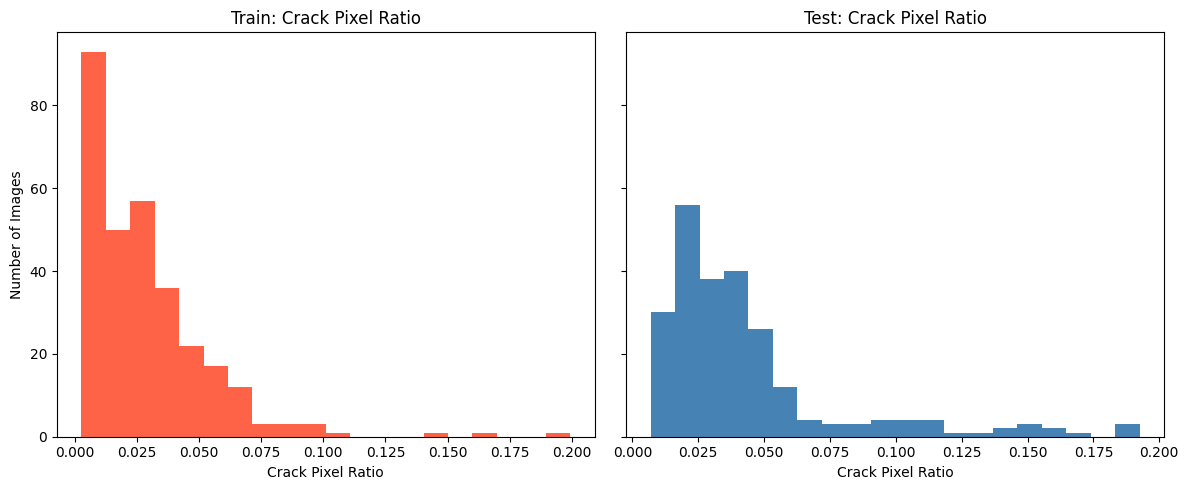

In [ ]:
crack_pixels = []
background_pixels = []

for bundle in train_dataset:
    image = bundle['image']
    mask = bundle['mask']
    mask_np = np.array(mask)
    
    crack = np.sum(mask_np)
    total = mask_np.size
    crack_pixels.append(crack)
    background_pixels.append(total - crack)

# Plot ratio
ratios_train = [c / (c + b) for c, b in zip(crack_pixels, background_pixels)]

crack_pixels = []
background_pixels = []

for bundle in test_dataset:
    image = bundle['image']
    mask = bundle['mask']
    mask_np = np.array(mask)
    
    crack = np.sum(mask_np)
    total = mask_np.size
    crack_pixels.append(crack)
    background_pixels.append(total - crack)

# Plot ratio
ratios_test = [c / (c + b) for c, b in zip(crack_pixels, background_pixels)]

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot for training set
axes[0].hist(ratios_train, bins=20, color='tomato')
axes[0].set_title("Train: Crack Pixel Ratio")
axes[0].set_xlabel("Crack Pixel Ratio")
axes[0].set_ylabel("Number of Images")

# Plot for test set
axes[1].hist(ratios_test, bins=20, color='steelblue')
axes[1].set_title("Test: Crack Pixel Ratio")
axes[1].set_xlabel("Crack Pixel Ratio")

# Adjust layout and save the figure
plt.tight_layout()
# Do not save the plot
#plt.savefig("./generated_figures/crack_pixel_ratio_train_vs_test.png", dpi=300, bbox_inches='tight')
plt.show()

## Some examples for image and masks

C:\Users\Csaba\AppData\Local\Temp\ipykernel_10556\2202456272.py:117: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  image = np.transpose(np.array(bundle['image']), (1, 2, 0))
C:\Users\Csaba\AppData\Local\Temp\ipykernel_10556\2202456272.py:118: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  mask = np.transpose(np.array(bundle['mask']), (1, 2, 0))


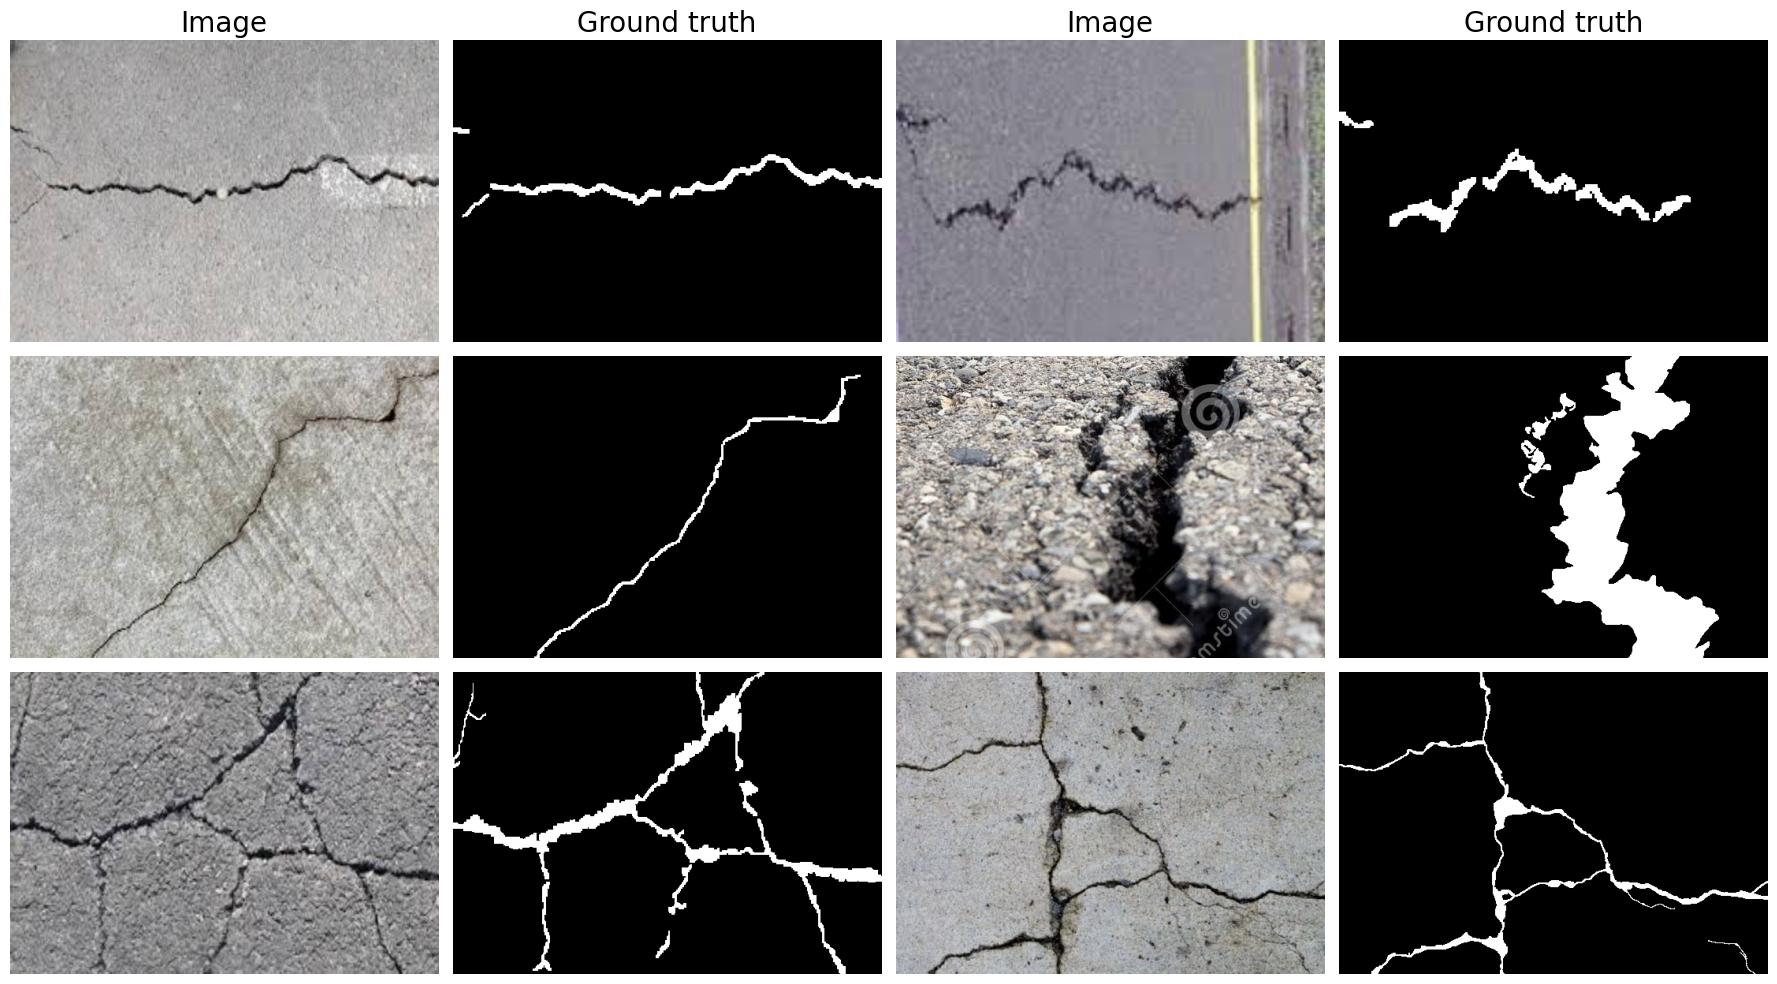

In [ ]:
images_to_list = ['11111.jpg','11114.jpg', '11130.jpg', '11116-3.jpg', '11117.jpg', '11134-3.jpg', ]
pairs = [train_dataset.get_image_and_mask_by_name(name) for name in images_to_list]
#plot_image_mask_grid(pairs, columns=2, scale = 10, path = "./generated_figures/dataset_overview.png")
# Do not save the plot
plot_image_mask_grid(pairs, columns=2, scale = 10, path = None)

# Training
This part contains the actual trainings of the different experiments mentioned in the thesis. The results of the trainings was saved to different folders and later it will be loaded for evaluation. This approach was useful, as the trainings took a very long period of time and it is not effective to keep the mdoel and every results in the RAM.

## Init

In [16]:
import os
import importlib
from torch import nn, cuda
from torch import optim
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [17]:
# CUDA
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
print(f'Number of visible CUDA devices: {cuda.device_count()}')
cuda.is_available()

Number of visible CUDA devices: 1


True

In [19]:
# Load data
data_source ='../DeepCrack/dataset/DeepCrack'
train_image_dir = data_source + '/train_img'
train_mask_dir = data_source + '/train_lab'
test_image_dir = data_source + '/test_img'
test_mask_dir = data_source + '/test_lab'

# With this setting only 3 images will be used in the training. It is useful for debuging the training loops, as with this small dataset it runs in a reasonable time.
train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2], limit_im_nr=3)
# The original code:
#train_dl, val_dl, train_dataset, val_dataset = load_data_deep_crack(train_image_dir, train_mask_dir, [0.8, 0.2])

This gives us 240 train and 60 validation samples.


## UNET
This part contains the trainng of the original unet models.

# Evaluation
This part 